In [426]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import random
import time
from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [427]:
#Q4

time_lst = []

In [428]:
# def calculate_time (dim, size, check):
    
#     time_lst = list()
    
#     if check is True:
        
#         temp = size[0]
        
#         for i in dim:
            
#             x, y = 

In [429]:
# Toy Data set
X = np.array([[0, 0], [1, 0], [0, 1]])
y = np.array([[1, 1, -1]]).T

In [455]:
#Hard margin SVM using CVXOPT

def hard_margin_SVM (X, y):
    
    time_start = time.time()

    y = y.reshape(-1,1) * 1.
    X_d = y * X
    H = np.dot(X_d , X_d.T) * 1.
    m,n = X.shape

    #CVXOPT
    q = cvxopt_matrix(-np.ones((m, 1)))
    G = cvxopt_matrix(-np.eye(m))
    h = cvxopt_matrix(np.zeros(m))
    b = cvxopt_matrix(np.zeros(1))
    A = cvxopt_matrix(y.reshape(1, -1))
    P = cvxopt_matrix(H)

    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    
    w = ((y * alphas).T @ X).reshape(-1,1)
    S = (alphas > 1e-10).flatten()
    b = y[S] - np.dot(X[S], w)
    
    print('Alphas = ',alphas[alphas > 1e-10])
    print('b = ', b[0])
    print('w = ', w)
    
    time_end = time.time()
    
    return (time_end - time_start)

In [456]:
temp_time = hard_margin_SVM (X, y)
time_lst.append(temp_time)
time_lst

Alphas =  [3.83569048e-01 2.00492764e-01 4.47571495e+00 6.60294352e-02
 4.00549136e-01 9.78840823e-01 1.34809383e+07 1.65482361e+00
 7.97460993e-01 1.66798892e-01 2.82595134e+00 4.82790880e-01
 3.04028191e+00 7.56622638e-02 4.07680912e-01 8.88930134e-02
 4.60204773e-01 8.17494178e-01 2.68856310e-01 1.60109627e+07
 3.57442430e-01 5.85675951e-01 4.79472357e-01 2.14488157e+07
 1.38601914e+08 5.84581419e-01 1.58217106e-01 6.56679160e-01
 4.41728736e-01 1.74047845e+00 2.04256058e+00 7.07118329e-02
 1.23605348e+00 1.82209493e-01 1.88001888e+00 5.89283873e+00
 1.77860650e+00 4.73299445e-01 1.67346547e+07 5.93865904e-01
 7.74994638e-01 7.87153692e-02 3.02901582e-01 4.54599414e-01
 5.17220447e-02 5.38445308e-01 3.00838109e+01 2.69565566e+00
 3.39771894e-01 3.69819279e-01 1.47593329e-01 6.63544913e-01
 7.71827451e-02 4.81534514e-01 8.39498327e-01 5.38309875e-01
 8.81204067e+08 4.88641670e-01 2.27738301e+00 1.20568327e+00
 2.64992656e-01 1.18692326e-01 7.85480207e-01 2.03125343e-01
 2.90572038e-0

[0.2904798984527588,
 0.03524470329284668,
 0.0323488712310791,
 0.009580135345458984,
 0.0446317195892334]

In [432]:
x_neg = []
y_neg = []
x_pos = []
y_pos = []

    
for j in range(20):
    
    for i in range(2):
        x_neg.append(np.round(random.uniform(0, 2.5), 1))  
        x_pos.append(np.round(random.uniform(1, 5), 2))


    y_pos.append(np.round(random.uniform(1, 25), 2))
    y_neg.append(np.round(random.uniform(-1, 20), 1)) 
    
x_pos = np.array(x_pos)
x_pos = x_pos.reshape((20, 2))
x_neg = np.array(x_neg)
x_neg = x_pos.reshape((20, 2))

X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))
y = y.reshape(-1, 1) * 1.

# print("X:", x_neg.shape)
# print("y:", y_neg.shape)


In [433]:
temp_time = hard_margin_SVM (X, y)
time_lst.append(temp_time)
time_lst

Alphas =  [8.52257612e+04 5.45060271e+04 7.94139847e+06 4.02392991e+06
 2.46985283e+08 1.45650679e+07 1.41254711e+06 5.35071822e+08
 5.04577354e+10 2.03667966e+07 8.44764894e+06 6.46097735e+07
 3.70692487e+05 4.72791921e+06 7.71759181e+06 8.26931188e+04
 1.48709180e+06 2.39174634e+05 2.15476811e+06 3.91378274e+07
 9.66006983e+04 7.29821290e+07 5.02905419e+06 4.42707970e+12
 2.48983709e+06 2.34863233e+08 1.47919091e+08 4.14895784e+09
 6.57710614e+07 2.77976394e+06 5.11581512e+05 9.51523765e+06
 2.43031410e+07 1.08153335e+07 2.65514974e+07 1.28039599e+05
 1.27471613e+05 1.70268257e+08 3.10671580e+10 1.42086343e+07]
w =  [[-0.00417552]
 [ 0.00070763]]
b =  [12.93571995]


[0.005808830261230469, 0.010313272476196289]

In [434]:
x_neg = []
y_neg = []
x_pos = []
y_pos = []

    
for j in range(100):
    
    for i in range(2):
        x_neg.append(np.round(random.uniform(0, 2.5), 1))  
        x_pos.append(np.round(random.uniform(1, 5), 2))


    y_pos.append(np.round(random.uniform(1, 25), 2))
    y_neg.append(np.round(random.uniform(-1, 20), 1)) 
    
x_pos = np.array(x_pos)
x_pos = x_pos.reshape((100, 2))
x_neg = np.array(x_neg)
x_neg = x_pos.reshape((100, 2))

X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))
y = y.reshape(-1, 1) * 1.

In [435]:
temp_time = hard_margin_SVM (X, y)
time_lst.append(temp_time)
time_lst

Alphas =  [6.92391450e+06 1.83707080e+07 1.52048011e+07 1.72706512e+06
 2.91337908e+06 9.31804077e+07 8.44932056e+07 1.62398146e+06
 2.88160679e+05 7.55145603e+05 9.26252767e+07 2.17590389e+06
 2.00307799e+07 3.02396107e+07 3.92197675e+05 1.73413803e+08
 1.34445805e+08 4.95749445e+07 7.49096653e+07 4.63479057e+06
 1.17093526e+06 1.63662656e+07 1.02746234e+06 1.09187932e+07
 2.93298728e+06 1.73751032e+07 2.32613223e+06 4.41085225e+06
 1.13241429e+06 3.20742845e+07 4.81604609e+06 1.00190642e+08
 1.47210000e+06 6.46169292e+07 1.94794174e+07 1.07642331e+06
 9.41688834e+07 6.53313314e+06 2.94934931e+06 3.11024240e+07
 1.23324205e+07 3.07207380e+06 2.44350675e+07 5.21245887e+06
 4.33998646e+06 4.66047795e+07 9.93025195e+05 3.22370661e+07
 1.39913770e+08 1.39605637e+06 1.27343505e+07 1.22604615e+07
 1.13407577e+07 2.29825522e+04 1.21490603e+07 1.87640689e+07
 5.25189290e+06 6.90091299e+05 3.42226944e+07 8.16274300e+06
 3.48708621e+07 1.13996422e+08 6.86733381e+04 5.58405035e+06
 1.02074592e+0

[0.005808830261230469, 0.010313272476196289, 0.04968905448913574]

In [436]:
x_neg = []
y_neg = []
x_pos = []
y_pos = []

    
for j in range(1000):
    
    for i in range(2):
        x_neg.append(np.round(random.uniform(0, 2.5), 1))  
        x_pos.append(np.round(random.uniform(1, 5), 2))


    y_pos.append(np.round(random.uniform(1, 25), 2))
    y_neg.append(np.round(random.uniform(-1, 20), 1)) 
    
x_pos = np.array(x_pos)
x_pos = x_pos.reshape((1000, 2))
x_neg = np.array(x_neg)
x_neg = x_pos.reshape((1000, 2))

X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))
y = y.reshape(-1, 1) * 1.

In [437]:
temp_time = hard_margin_SVM (X, y)
time_lst.append(temp_time)
time_lst

Alphas =  [ 1489988.44456512  1445475.84294736  7924279.75827122 ...
  1748588.73096933 13888078.44766596  1632940.43889374]
w =  [[3.05175781e-05]
 [1.52587891e-05]]
b =  [9.97982712]


[0.005808830261230469,
 0.010313272476196289,
 0.04968905448913574,
 3.525284767150879]

Text(0, 0.5, 'Time taken')

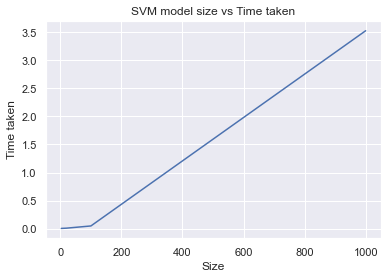

In [441]:
plt.figure()
plt.plot([3, 20, 100, 1000], time_lst)
plt.xlabel ("Size")
plt.title ("SVM model size vs Time taken")
plt.ylabel ("Time taken")

In [448]:
time_lst = list()
x_neg = []
y_neg = []
x_pos = []
y_pos = []

    
for j in range(100):
    
    for i in range(5):
        x_neg.append(np.round(random.uniform(0, 2.5), 1))  
        x_pos.append(np.round(random.uniform(1, 5), 2))


    y_pos.append(np.round(random.uniform(1, 25), 2))
    y_neg.append(np.round(random.uniform(-1, 20), 1)) 
    
x_pos = np.array(x_pos)
x_pos = x_pos.reshape((100, 5))
x_neg = np.array(x_neg)
x_neg = x_pos.reshape((100, 5))

X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))
y = y.reshape(-1, 1) * 1.

temp_time = hard_margin_SVM (X, y)
time_lst.append(temp_time)
time_lst

Alphas =  [3.51820145e+04 5.70432460e+04 1.14331676e+05 2.33891236e+04
 4.28144042e+04 1.28900320e+10 2.64910179e+04 5.82072974e+05
 4.96085210e+05 9.83632312e+04 4.12909749e+04 1.35069481e+05
 8.76500222e+09 1.25094297e+08 4.34062132e+04 6.85439553e+04
 2.69609770e+05 2.23037801e+04 8.53977764e+04 4.79594289e+05
 1.35725262e+05 8.78056561e+04 6.19124964e+04 4.19471785e+04
 5.95417603e+04 1.31750786e+05 1.10528894e+05 1.89620928e+05
 3.36779613e+04 5.81353211e+08 1.52614198e+04 7.26751825e+04
 1.57392591e+04 7.16507286e+04 5.22972900e+05 9.16890718e+04
 3.39921041e+06 3.29363168e+04 9.45600542e+05 3.06887528e+04
 1.98263720e+05 1.76799467e+05 1.88978659e+06 2.51205900e+05
 2.11359575e+04 1.47643677e+06 2.72203882e+05 2.77079918e+05
 3.47603338e+04 7.10946829e+04 2.57320929e+09 5.86684173e+04
 1.12089874e+05 3.42986331e+04 1.30057694e+04 9.31714414e+08
 1.16160123e+05 9.53247360e+04 4.16350402e+04 1.35821996e+04
 8.90356616e+04 4.30149493e+04 1.12229734e+05 4.83786569e+04
 1.05333051e+0

[0.2904798984527588]

In [449]:
x_neg = []
y_neg = []
x_pos = []
y_pos = []

    
for j in range(100):
    
    for i in range(10):
        x_neg.append(np.round(random.uniform(0, 2.5), 1))  
        x_pos.append(np.round(random.uniform(1, 5), 2))


    y_pos.append(np.round(random.uniform(1, 25), 2))
    y_neg.append(np.round(random.uniform(-1, 20), 1)) 
    
x_pos = np.array(x_pos)
x_pos = x_pos.reshape((100, 10))
x_neg = np.array(x_neg)
x_neg = x_pos.reshape((100, 10))

X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))
y = y.reshape(-1, 1) * 1.

temp_time = hard_margin_SVM (X, y)
time_lst.append(temp_time)
time_lst

Alphas =  [4.72836611e+07 1.52625545e+09 3.60375317e+07 1.22140467e+08
 1.37002563e+05 5.84056156e+08 1.83857648e+07 2.91061227e+07
 6.79539068e+08 1.75515539e+08 1.78072595e+06 2.55478151e+06
 1.63411800e+08 1.97159681e+09 1.81519079e+06 2.57664958e+07
 5.73339976e+06 6.31442426e+04 3.17882642e+07 4.61242616e+06
 9.37245636e+06 1.72950058e+08 5.82751325e+06 1.02563479e+08
 7.61479649e+07 8.57677222e+05 1.57608691e+07 2.58067361e+07
 1.74487914e+07 3.57478297e+07 1.73577010e+08 7.44180508e+06
 4.37104906e+04 1.94807097e+06 8.50741956e+06 3.18505183e+10
 3.24110177e+08 7.31771717e+06 2.72355412e+07 1.90214398e+09
 5.90088477e+06 1.53057970e+07 4.85965588e+08 1.46336910e+06
 6.49395626e+06 2.70382156e+08 1.34657030e+07 2.43467943e+06
 5.90092032e+06 1.40738460e+06 9.40340880e+05 4.82227636e+07
 3.22859549e+06 2.63054333e+05 1.57530630e+06 9.52947026e+06
 1.00030869e+10 1.60373310e+10 8.78670729e+05 2.36145241e+07
 2.11414865e+07 4.02215585e+06 2.50403696e+08 2.86671312e+08
 2.22863796e+0

[0.2904798984527588, 0.03524470329284668]

In [450]:
x_neg = []
y_neg = []
x_pos = []
y_pos = []

    
for j in range(100):
    
    for i in range(20):
        x_neg.append(np.round(random.uniform(0, 2.5), 1))  
        x_pos.append(np.round(random.uniform(1, 5), 2))


    y_pos.append(np.round(random.uniform(1, 25), 2))
    y_neg.append(np.round(random.uniform(-1, 20), 1)) 
    
x_pos = np.array(x_pos)
x_pos = x_pos.reshape((100, 20))
x_neg = np.array(x_neg)
x_neg = x_pos.reshape((100, 20))

X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))
y = y.reshape(-1, 1) * 1.

temp_time = hard_margin_SVM (X, y)
time_lst.append(temp_time)
time_lst

Alphas =  [5.28842860e+04 1.49752728e+05 6.75124191e+06 1.83780472e+10
 8.78528370e+04 2.61309142e+04 1.43963988e+04 4.82828794e+05
 1.86361231e+08 4.49746963e+05 1.72377127e+06 2.02628771e+05
 1.11614809e+04 2.86126214e+03 2.35450164e+04 2.24805332e+04
 2.06039659e+09 6.72851610e+07 5.69293059e+04 5.54499977e+05
 1.29506866e+04 5.75942812e+05 9.73083993e+04 9.85498261e+05
 2.16819478e+04 1.53689372e+04 3.10607438e+07 5.08865371e+05
 3.78022789e+03 5.89123458e+05 2.97804619e+04 1.12026897e+05
 3.97235057e+07 7.49293942e+03 4.39186850e+05 2.13587805e+03
 3.97367928e+06 2.62483907e+04 2.26069588e+06 8.02040030e+06
 4.43737223e+06 2.61978431e+04 3.35724878e+04 9.91848998e+04
 4.39534285e+04 3.30962078e+04 1.42171894e+05 2.36292476e+08
 1.37950179e+05 8.78680956e+04 2.12577691e+06 8.13460657e+03
 1.01748360e+07 2.99744437e+07 1.17856042e+04 1.96905466e+08
 2.58595743e+04 2.04220940e+05 2.86217482e+04 8.13813266e+05
 2.72558137e+07 1.73520192e+02 6.44524295e+04 6.00152909e+07
 8.04887609e+0

[0.2904798984527588, 0.03524470329284668, 0.0323488712310791]

In [451]:
x_neg = []
y_neg = []
x_pos = []
y_pos = []

    
for j in range(100):
    
    for i in range(50):
        x_neg.append(np.round(random.uniform(0, 2.5), 1))  
        x_pos.append(np.round(random.uniform(1, 5), 2))


    y_pos.append(np.round(random.uniform(1, 25), 2))
    y_neg.append(np.round(random.uniform(-1, 20), 1)) 
    
x_pos = np.array(x_pos)
x_pos = x_pos.reshape((100, 50))
x_neg = np.array(x_neg)
x_neg = x_pos.reshape((100, 50))

X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))
y = y.reshape(-1, 1) * 1.

temp_time = hard_margin_SVM (X, y)
time_lst.append(temp_time)
time_lst

Alphas =  [3.83569048e-01 2.00492764e-01 4.47571495e+00 6.60294352e-02
 4.00549136e-01 9.78840823e-01 1.34809383e+07 1.65482361e+00
 7.97460993e-01 1.66798892e-01 2.82595134e+00 4.82790880e-01
 3.04028191e+00 7.56622638e-02 4.07680912e-01 8.88930134e-02
 4.60204773e-01 8.17494178e-01 2.68856310e-01 1.60109627e+07
 3.57442430e-01 5.85675951e-01 4.79472357e-01 2.14488157e+07
 1.38601914e+08 5.84581419e-01 1.58217106e-01 6.56679160e-01
 4.41728736e-01 1.74047845e+00 2.04256058e+00 7.07118329e-02
 1.23605348e+00 1.82209493e-01 1.88001888e+00 5.89283873e+00
 1.77860650e+00 4.73299445e-01 1.67346547e+07 5.93865904e-01
 7.74994638e-01 7.87153692e-02 3.02901582e-01 4.54599414e-01
 5.17220447e-02 5.38445308e-01 3.00838109e+01 2.69565566e+00
 3.39771894e-01 3.69819279e-01 1.47593329e-01 6.63544913e-01
 7.71827451e-02 4.81534514e-01 8.39498327e-01 5.38309875e-01
 8.81204067e+08 4.88641670e-01 2.27738301e+00 1.20568327e+00
 2.64992656e-01 1.18692326e-01 7.85480207e-01 2.03125343e-01
 2.90572038e-0

[0.2904798984527588,
 0.03524470329284668,
 0.0323488712310791,
 0.009580135345458984]

Text(0, 0.5, 'Time taken')

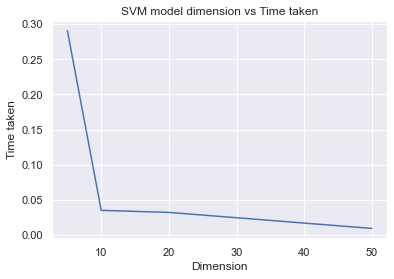

In [454]:
plt.figure()
plt.plot([5, 10, 20, 50], time_lst)
plt.xlabel ("Dimension")
plt.title ("SVM model dimension vs Time taken")
plt.ylabel ("Time taken")

In [468]:
### Q5
def soft_margin_SVC (X, y, penalty = 10, mod = 'linear'):
    
    temp = SVC(C = penalty, kernel = mod)
    temp.fit(X, y.ravel()) 

    if mod == 'linear':
        print('w =', temp.coef_)
    print("b =", temp.intercept_)
    print('Support vectors =', temp.support_vectors_)
    print('Indices of support vectors =', temp.support_)
    
#     return temp.coef_, temp.intercept_, temp.support_, temp.support_vectors_


In [469]:
# Toy Data set
X = np.array([[0, 0], [1, 0], [0, 1]])
y = np.array([[1, 1, -1]]).T
toy_data_soft = soft_margin_SVC (X, y, 1)

w = [[ 0. -1.]]
b = [1.]
Support vectors = [[0. 1.]
 [0. 0.]]
Indices of support vectors = [2 0]


In [470]:
toy_data_soft = soft_margin_SVC (X, y, 10)

w = [[ 0. -2.]]
b = [1.]
Support vectors = [[0. 1.]
 [0. 0.]]
Indices of support vectors = [2 0]


In [471]:
#Q5 part 2
import scipy.io
mat = scipy.io.loadmat('data (1).mat')

In [472]:
# mat

In [473]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'X'])


In [474]:
X = mat["X"]
y = mat["Y"]

In [475]:
len(X)

270

In [476]:
print(len(y))

270


In [477]:
test_x = X[:100]
test_y = y[:100]
train_x = X[100:]
train_y = y[100:]

In [478]:
train_data_soft = soft_margin_SVC (train_x, train_y, 10)

w = [[ 0.42482156  0.77559427  1.04607794  1.28548069  1.11167658 -0.56086608
   0.40345613 -1.25711188  0.24503154  1.46717034  0.67576881  1.03679338
   0.83527176]]
b = [1.83511215]
Support vectors = [[ 0.0416667   1.          0.333333   -0.415094   -0.328767   -1.
   1.          0.236641   -1.         -0.83871     1.         -0.333333
  -1.        ]
 [ 0.0416667   1.          0.333333    0.0566038  -0.515982   -1.
   1.          0.435115   -1.         -0.483871   -1.         -1.
   1.        ]
 [-0.291667   -1.          0.333333   -0.0943396  -0.767123   -1.
   1.          0.358779    1.         -0.548387    1.         -1.
  -1.        ]
 [ 0.166667    1.          1.         -0.283019   -0.630137   -1.
  -1.          0.480916    1.         -1.         -1.         -1.
   1.        ]
 [ 0.25        1.          1.         -0.169811   -0.3379     -1.
   1.          0.694656   -1.         -1.         -1.         -1.
  -1.        ]
 [-0.0833333   1.         -1.         -0.415094   -0.602

In [479]:
train_data_soft = soft_margin_SVC (train_x, train_y, 1)

w = [[ 0.48630996  0.56115662  0.79900022  0.59734148  0.72874105 -0.36620434
   0.33189701 -0.80453128  0.25194982  0.87879053  0.38823057  0.72112544
   0.74243134]]
b = [0.94767141]
Support vectors = [[-0.0833333   1.          0.333333   -0.886792   -0.561644   -1.
  -1.          0.0992366   1.         -0.612903    0.         -1.
  -1.        ]
 [ 0.0416667   1.          0.333333   -0.415094   -0.328767   -1.
   1.          0.236641   -1.         -0.83871     1.         -0.333333
  -1.        ]
 [ 0.0416667   1.          0.333333    0.0566038  -0.515982   -1.
   1.          0.435115   -1.         -0.483871   -1.         -1.
   1.        ]
 [-0.291667   -1.          0.333333   -0.0943396  -0.767123   -1.
   1.          0.358779    1.         -0.548387    1.         -1.
  -1.        ]
 [ 0.166667    1.          1.         -0.283019   -0.630137   -1.
  -1.          0.480916    1.         -1.         -1.         -1.
   1.        ]
 [ 0.25        1.          1.         -0.169811   -0.337

In [480]:
train_data_soft = soft_margin_SVC (train_x, train_y, 100)

w = [[ 0.42502577  0.77573772  1.04635056  1.28558797  1.11147222 -0.56089144
   0.40349679 -1.25731724  0.24495974  1.46712876  0.67580769  1.03685521
   0.83545558]]
b = [1.83471142]
Support vectors = [[ 0.0416667   1.          0.333333   -0.415094   -0.328767   -1.
   1.          0.236641   -1.         -0.83871     1.         -0.333333
  -1.        ]
 [ 0.0416667   1.          0.333333    0.0566038  -0.515982   -1.
   1.          0.435115   -1.         -0.483871   -1.         -1.
   1.        ]
 [-0.291667   -1.          0.333333   -0.0943396  -0.767123   -1.
   1.          0.358779    1.         -0.548387    1.         -1.
  -1.        ]
 [ 0.166667    1.          1.         -0.283019   -0.630137   -1.
  -1.          0.480916    1.         -1.         -1.         -1.
   1.        ]
 [ 0.25        1.          1.         -0.169811   -0.3379     -1.
   1.          0.694656   -1.         -1.         -1.         -1.
  -1.        ]
 [-0.0833333   1.         -1.         -0.415094   -0.602

In [481]:
train_data_soft = soft_margin_SVC (train_x, train_y, 1, mod = 'poly')

b = [0.32630198]
Support vectors = [[-0.0833333  1.         0.333333  ...  0.        -1.        -1.       ]
 [ 0.0416667 -1.         0.333333  ... -1.        -1.        -1.       ]
 [ 0.541667  -1.        -1.        ...  1.        -1.        -1.       ]
 ...
 [ 0.458333   1.         0.333333  ... -1.        -1.        -1.       ]
 [ 0.208333   1.        -0.333333  ...  0.        -1.        -1.       ]
 [-0.208333   1.        -0.333333  ...  1.        -1.         1.       ]]
Indices of support vectors = [  6  13  18  24  28  34  35  39  41  43  51  53  58  64  65  67  68  70
  73  80  84  85  87  88  90  92  94  97 100 105 107 109 111 117 118 125
 128 129 132 134 138 144 153 155 156 168   1   3   5   8  10  12  16  20
  29  30  31  33  37  42  44  46  48  59  60  61  69  75  77  78  82  86
 103 108 110 126 127 130 131 133 137 140 143 148 150 152 158 162 164]


In [482]:
train_data_soft = soft_margin_SVC (train_x, train_y, 10, mod = 'poly')

b = [0.65873833]
Support vectors = [[-0.0833333  1.         0.333333  ...  0.        -1.        -1.       ]
 [ 0.0416667 -1.         0.333333  ... -1.        -1.        -1.       ]
 [ 0.541667  -1.        -1.        ...  1.        -1.        -1.       ]
 ...
 [ 0.458333   1.         0.333333  ... -1.        -1.        -1.       ]
 [ 0.208333   1.        -0.333333  ...  0.        -1.        -1.       ]
 [-0.208333   1.        -0.333333  ...  1.        -1.         1.       ]]
Indices of support vectors = [  6  13  18  23  24  28  34  35  39  41  43  53  57  58  64  65  68  70
  73  80  85  87  88  90  94  97 100 105 107 109 111 117 118 125 129 132
 134 136 138 139 144 156 168   3   5   8  10  12  16  20  29  31  33  37
  42  44  46  48  59  60  61  69  75  77  78  82 103 108 110 126 130 131
 143 148 150 152 158 162 164]


In [483]:
train_data_soft = soft_margin_SVC (train_x, train_y, 100, mod = 'poly')

b = [0.79847114]
Support vectors = [[-0.0833333   1.          0.333333   -0.886792   -0.561644   -1.
  -1.          0.0992366   1.         -0.612903    0.         -1.
  -1.        ]
 [ 0.0416667  -1.          0.333333   -0.226415   -0.187215    1.
  -1.          0.51145    -1.         -1.         -1.         -1.
  -1.        ]
 [ 0.541667   -1.         -1.          0.0566038  -0.543379   -1.
  -1.         -0.343511   -1.         -0.16129     1.         -1.
  -1.        ]
 [ 0.5        -1.          0.333333    0.245283    0.0684932  -1.
   1.          0.221374   -1.         -0.741935   -1.         -1.
  -1.        ]
 [ 0.0416667   1.          0.333333   -0.415094   -0.328767   -1.
   1.          0.236641   -1.         -0.83871     1.         -0.333333
  -1.        ]
 [-0.0416667   1.         -0.333333   -0.245283   -0.657534   -1.
  -1.          0.328244   -1.         -0.741935   -1.         -0.333333
  -1.        ]
 [ 0.0416667   1.          0.333333    0.0566038  -0.515982   -1.
   1.

   1.        ]]
Indices of support vectors = [  6  13  18  23  24  28  34  35  36  39  41  43  53  58  62  64  65  68
  70  80  85  87  88  90  94 105 109 111 117 118 125 129 134 136 153 156
 168   5   8  12  16  20  31  33  37  42  46  59  60  61  69  71  75  77
  78  82 103 108 110 126 143 148 150 152 158 162 164]


In [484]:
train_data_soft = soft_margin_SVC (train_x, train_y, 1, mod = 'sigmoid')

b = [0.28770906]
Support vectors = [[-0.0833333   1.          0.333333   -0.886792   -0.561644   -1.
  -1.          0.0992366   1.         -0.612903    0.         -1.
  -1.        ]
 [ 0.5        -1.          0.333333    0.245283    0.0684932  -1.
   1.          0.221374   -1.         -0.741935   -1.         -1.
  -1.        ]
 [ 0.0416667   1.          0.333333   -0.415094   -0.328767   -1.
   1.          0.236641   -1.         -0.83871     1.         -0.333333
  -1.        ]
 [-0.0416667  -1.          0.333333   -0.207547   -0.680365   -1.
   1.          0.496183   -1.         -0.967742    0.         -1.
  -1.        ]
 [ 0.0416667   1.          0.333333    0.0566038  -0.515982   -1.
   1.          0.435115   -1.         -0.483871   -1.         -1.
   1.        ]
 [-0.291667   -1.          0.333333   -0.0943396  -0.767123   -1.
   1.          0.358779    1.         -0.548387    1.         -1.
  -1.        ]
 [ 0.166667    1.          1.         -0.283019   -0.630137   -1.
  -1.      

In [485]:
train_data_soft = soft_margin_SVC (train_x, train_y, 10, mod = 'sigmoid')

b = [2.08567116]
Support vectors = [[ 0.5        -1.          0.333333    0.245283    0.0684932  -1.
   1.          0.221374   -1.         -0.741935   -1.         -1.
  -1.        ]
 [ 0.0416667   1.          0.333333   -0.415094   -0.328767   -1.
   1.          0.236641   -1.         -0.83871     1.         -0.333333
  -1.        ]
 [-0.0416667  -1.          0.333333   -0.207547   -0.680365   -1.
   1.          0.496183   -1.         -0.967742    0.         -1.
  -1.        ]
 [ 0.166667    1.          1.         -0.283019   -0.630137   -1.
  -1.          0.480916    1.         -1.         -1.         -1.
   1.        ]
 [-0.0833333   1.         -1.         -0.415094   -0.60274    -1.
   1.         -0.175573    1.         -0.548387   -1.         -0.333333
  -1.        ]
 [-0.125      -1.          1.         -0.698113   -0.415525   -1.
   1.          0.343511   -1.         -1.         -1.         -1.
  -1.        ]
 [ 0.625      -1.          0.333333   -0.509434   -0.611872   -1.
   1.

In [486]:
train_data_soft = soft_margin_SVC (train_x, train_y, 100, mod = 'sigmoid')

b = [16.27551665]
Support vectors = [[ 0.5        -1.          0.333333    0.245283    0.0684932  -1.
   1.          0.221374   -1.         -0.741935   -1.         -1.
  -1.        ]
 [ 0.0416667   1.          0.333333   -0.415094   -0.328767   -1.
   1.          0.236641   -1.         -0.83871     1.         -0.333333
  -1.        ]
 [ 0.166667    1.          1.         -0.283019   -0.630137   -1.
  -1.          0.480916    1.         -1.         -1.         -1.
   1.        ]
 [-0.0833333   1.         -1.         -0.415094   -0.60274    -1.
   1.         -0.175573    1.         -0.548387   -1.         -0.333333
  -1.        ]
 [-0.0833333  -1.          0.333333   -0.320755   -0.406393   -1.
   1.          0.19084    -1.         -0.83871    -1.         -1.
  -1.        ]
 [-0.125      -1.          1.         -0.698113   -0.415525   -1.
   1.          0.343511   -1.         -1.         -1.         -1.
  -1.        ]
 [ 0.625      -1.          0.333333   -0.509434   -0.611872   -1.
   1